# DATA 1 Practical 8

Simos Gerasimou


## A Data Journey in Inferential Statistics

**Pandas API Reference**: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

**Matplotlib API Reference**: https://matplotlib.org/stable/api/index.html

**Seaborn API Reference**: https://seaborn.pydata.org/api.html

**Scipy Stats**: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

**t table Reference**:  http://www.ttable.org

**F table Reference**  https://www.stat.purdue.edu/~jtroisi/STAT350Spring2015/tables/FTable.pdf

**Chi-Square table Reference** https://people.smp.uq.edu.au/YoniNazarathy/stat_models_B_course_spring_07/distributions/chisqtab.pdf


***

#### To get started with today's practical, you can go to Lecture 10 and try to replicate the inferential statistics we saw during the lecture, i.e., independent and paired t test, ANOVA and Chi-Square. This will enable you to understand better how these tests operate under the hood.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math as m
import pandas as pd

In [2]:
def plotKDE(dof, tstatistic, title, xaxis, alpha=0.05, type='two-tailed'):
  fig, ax = plt.subplots(figsize=(5,4), dpi=100)
  mu =0
  data = np.random.standard_t(dof, size=3000)
  sns.kdeplot(data, ax=ax)

  xx = ax.lines[-1].get_xdata()
  yy = ax.lines[-1].get_ydata()

  if (type=="two-tailed"):
    xxCut1 = stats.t.ppf(q=alpha/2, df=dof)
    ax.fill_between(xx, 0, yy, where=(xx<=xxCut1), color='red', alpha=0.5)
    ax.axvline(x=xxCut1, ymin=0.00, ymax=np.max(yy), color='red',alpha=0.5, ls='--', lw=1, label='Critical value') # vertical line
    ax.axvline(x=tstatistic, ymin=0.00, ymax=np.max(yy), color='blue',alpha=0.5, ls='--', lw=1, label='t value') # vertical line

    xxCut2 = stats.t.ppf(q=1-alpha/2, df=dof)
    ax.fill_between(xx, 0, yy, where=(xx>=xxCut2), color='red', alpha=0.5)
    ax.axvline(x=xxCut2, ymin=0.00, ymax=np.max(yy), color='red',alpha=0.5, ls='--', lw=1) # vertical line
    ax.axvline(x=-tstatistic, ymin=0.00, ymax=np.max(yy), color='blue',alpha=0.5, ls='--', lw=1) # vertical line
  
  elif (type=='left-tailed'):
    xxCut1 = stats.t.ppf(q=alpha, df=dof)
    ax.fill_between(xx, 0, yy, where=(xx<=xxCut1), color='red', alpha=0.5)
    ax.axvline(x=xxCut1, ymin=0.00, ymax=np.max(yy), color='red',alpha=0.5, ls='--', lw=1, label='Critical value') # vertical line
    ax.axvline(x=tstatistic, ymin=0.00, ymax=np.max(yy), color='blue',alpha=0.5, ls='--', lw=1, label='t value') # vertical line

  elif (type=='right-tailed'):
    xxCut2 = stats.t.ppf(q=1-alpha, df=dof)
    ax.fill_between(xx, 0, yy, where=(xx>=xxCut2), color='red', alpha=0.5)
    ax.axvline(x=xxCut2, ymin=0.00, ymax=np.max(yy), color='red',alpha=0.5, ls='--', lw=1,label='Critical value') # vertical line
    ax.axvline(x=tstatistic, ymin=0.00, ymax=np.max(yy), color='blue',alpha=0.5, ls='--', lw=1, label='t value') # vertical line

  plt.title(title,fontsize=15)
  ax.set_xlabel(xaxis,fontsize=13) # set x label
  ax.set_ylabel('pdf(x)',fontsize=13,rotation=90) # set y label
  plt.legend();

***

## **Part A**

A manufacturer claims that the thickness of the spearmint gum it produces is according to the interantional standard which requests to be 7.5. A quality control specialist regularly checks this claim. During a production run, he took a random sample of $n = 10$ pieces of gum and measured their thickness. He obtained the following readings [7.65, 7.60, 7.65, 7.70, 7.55, 7.55, 7.40, 7.40, 7.50, 7.50] and would like to assess the validity of the claim made by the manufacturer having suspicions that the thickness might be not within the acceptable limits.

**TA1) State the Null and Alternative hypotheses**

In [3]:
#Note: two-tailed
#H0 : μ  = 7.5
#H1:  μ != 7.5

**TA2) Calculate the degrees of freedom**

In [4]:
factory = [7.65, 7.60, 7.65, 7.70, 7.55, 7.55, 7.40, 7.40, 7.50, 7.50]
dfF = len(factory) -1
print("There are %d degrees of freedom" % (dfF)) #9 df (n-1)

There are 9 degrees of freedom


**TA3) Perform the appropriate t test to evaluate the hypotheses for significance level $\alpha = 0.05$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

**Hint**: You may want to check https://docs.scipy.org/doc/scipy/reference/stats.html

In [5]:
#Using t formula
mu = 7.5
alpha = 0.05
t1 = (np.mean(factory) - mu) / (np.std(factory, ddof=1)/np.sqrt(len(factory)))

#Using library: check the documentation - Scipy gives by default a two-tailed test
t2=stats.ttest_1samp(factory, popmean=mu)

print("T value analytically: %.3f" % (t1))
print("T value using scipy: %.3f"  % (t2.statistic))

#Because it is a two-tailed probability, we need to assing half of alpha on each tail of the t distribution
t_crit = stats.t.ppf(alpha/2, df=dfF)
print("T critical:%.3f" % (t_crit))

#Using the t value
print("t(%d)=%.3f < %.3f=t_crit -> H0 is not rejected (not exceeding the critical value) " %
      (dfF, np.abs(t1), np.abs(t_crit)))

#Using the p value and alpha significance level
print("p=%.3f > %.3f=α -> H0 is not rejected (not lower than α) " %(t2.pvalue, alpha))

T value analytically: 1.539
T value using scipy: 1.539
T critical:-2.262
t(9)=1.539 < 2.262=t_crit -> H0 is not rejected (not exceeding the critical value) 
p=0.158 > 0.050=α -> H0 is not rejected (not lower than α) 


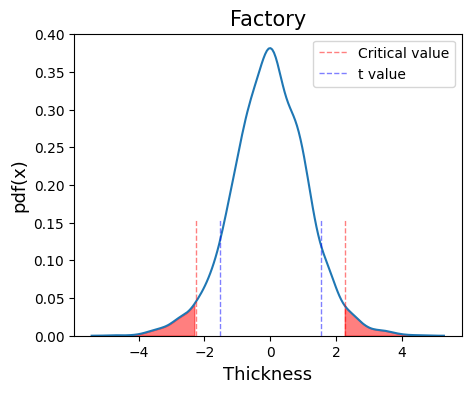

In [6]:
plotKDE(dfF, t1, "Factory", "Thickness")

## **Part B**

A personal trainer measured the maximum heart rate of 25 of their trainees. The resulting data is: 
[170, 167, 174, 179, 179, 187, 179, 183, 179, 156, 163, 156, 187, 156, 167, 156, 174, 170, 183, 179, 174, 179, 170, 159, 187]. The personal trainer believes that their mean heart rate is greater than 170 and he is interested in testing this hypothesis.

**TB1) State the Null and Alternative hypotheses**

In [7]:
#Note: one-tailed (more)
#H0 : μ = 170
#H1: μ > 170

**TB2) Calculate the degrees of freedom**

In [8]:
rate = [170, 167, 174, 179, 179, 187, 179, 183, 179, 156, 163, 156, 187, 156, 167, 156, 174, 170, 183, 179, 174, 179, 170, 159, 187]
dfR = len(rate) -1
print("There are %d degrees of freedom" % (dfR)) #24 df (n-1)

There are 24 degrees of freedom


**TB3) Perform the appropriate t test to evaluate the hypotheses for significance level $\alpha = 0.05$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [9]:
#Using t formula
mu = 170
alpha = 0.05
t1 = (np.mean(rate) - mu) / (np.std(rate, ddof=1)/np.sqrt(len(rate)))

#Using library
t2=stats.ttest_1samp(rate, mu)

print("T value analytically: %.3f" % (t1))
print("T value using scipy: %.3f"  % (t2.statistic))

#Because we want > => the rejection region lies on upper tail of the t-Distribution (upper-tailed)
#The ppf gives the lower tail probability, so we subtract from 1 to get the upper tail
t_crit = stats.t.ppf(1-alpha, df=dfR)
print("T critical:%.3f" % (t_crit))


#Using the t value
print("t(%d)=%.3f < %.3f=t_crit -> H0 is not rejected (not exceeding the critical value) " %
      (dfR, np.abs(t1), np.abs(t_crit)))

#Using the p value and alpha significance level
#According to the Scipy documentation, the pvalue is for a two-tailed t-test, so we must divide the p by 2 for one-tailed tests
#This is the easiest way to convert a two-tailed test into a one-tailed test
print("p=%.3f > %.3f=α -> H0 is not rejected (not lower than α) " %(t2.pvalue/2, alpha))

T value analytically: 1.222
T value using scipy: 1.222
T critical:1.711
t(24)=1.222 < 1.711=t_crit -> H0 is not rejected (not exceeding the critical value) 
p=0.117 > 0.050=α -> H0 is not rejected (not lower than α) 


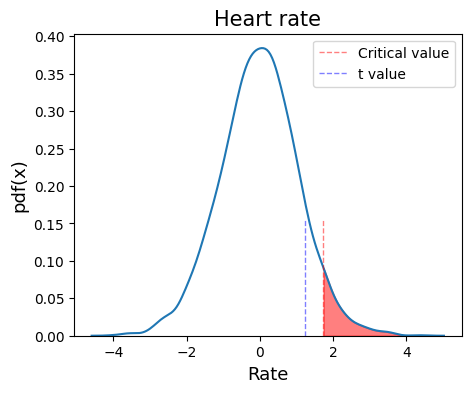

In [10]:
plotKDE(dfR, t1, "Heart rate", "Rate", type='right-tailed')

## **Part C**

A biologist is interested in determining whether sunflower seedlings treated with a special extract results in a lower average height of sunflower seedlings than the standard height of 15.7 cm. The biologist treated a random sample of n = 33 seedlings with the extract and subsequently obtained the following heights: [11.5, 11.8, 15.7, 16.1, 14.1, 10.5, 9.3, 15.0, 11.1, 15.2, 19.0, 12.8, 12.4, 19.2, 13.5, 12.2, 13.3, 16.5, 13.5, 14.4, 16.7, 10.9, 13.0, 10.3, 15.8, 15.1, 17.1, 13.3, 12.4, 8.5, 14.3, 12.9, 13.5]

**TC1) State the Null and Alternative hypotheses**

In [11]:
#One-tailed (less)
#H0 : μ = 15.7
#H1: μ < 15.7

**TC2) Calculate the degrees of freedom**

In [12]:
flower = [11.5, 11.8, 15.7, 16.1, 14.1, 10.5, 9.3, 15.0, 11.1, 15.2, 19.0, 12.8, 12.4, 19.2, 13.5, 12.2, 13.3, 16.5, 13.5, 14.4, 16.7, 10.9, 13.0, 10.3, 15.8, 15.1, 17.1, 13.3, 12.4, 8.5, 14.3, 12.9, 13.5]
dfL = len(flower) -1
print("There are %d degrees of freedom" % (dfL)) #32 df (n-1)

There are 32 degrees of freedom


**TC3) Perform the appropriate t test to evaluate the hypotheses for significance level $\alpha = 0.05$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [13]:
#Using t formula
mu = 15.7
alpha = 0.05
t1 = (np.mean(flower) - mu) / (np.std(flower, ddof=1)/np.sqrt(len(flower)))

#Using library
t2=stats.ttest_1samp(flower, mu)

print("T value analytically: %.3f" % (t1))
print("T value using scipy: %.3f"  % (t2.statistic))

#Because we want <15.7 => the rejection region lies on lower tail of the t-Distribution (lower-tailed)
#The ppf gives the lower tail probability, so we subtract from 1 to get the upper tail
t_crit = stats.t.ppf(alpha, df=dfL)
print("T critical:%.3f" % (t_crit))

#Using the t value
print("t(%d)=%.3f > %.3f=t_crit -> REJECT H0 (t statistic exceeds the critical value) " %
      (dfL, np.abs(t1), np.abs(t_crit)))

#Using the p value and alpha significance level
#According to the Scipy documentation, the pvalue is for a two-tailed t-test, so we must divide the p by 2 for one-tailed tests
#This is the easiest way to convert a two-tailed test into a one-tailed test
print("p=%.6f < %.3f=α -> H0 is REJECTED (lower than α) " %(t2.pvalue/2, alpha))

T value analytically: -4.599
T value using scipy: -4.599
T critical:-1.694
t(32)=4.599 > 1.694=t_crit -> REJECT H0 (t statistic exceeds the critical value) 
p=0.000032 < 0.050=α -> H0 is REJECTED (lower than α) 


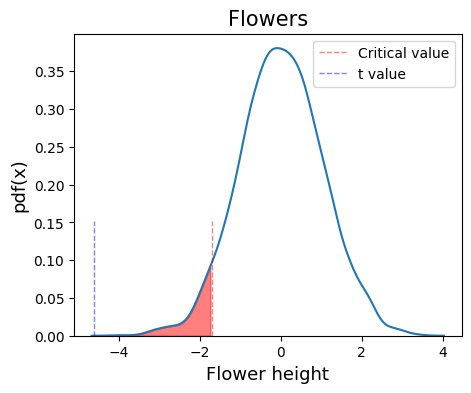

In [14]:
plotKDE(dfL, t1, "Flowers", "Flower height", type='left-tailed')

## **Part D**

The board of directors at Netflix believes that "Displaying better artwork will result in greater engagement by members". To test this hypothesis the data science team carries out an experiment in which they show to two groups different artworks and measure their engangement rate. The team collected the following data:

Group Control: [-0.5, 3.3, -9.3, 11.3, -5.4, 0, 12.3, -1, -2, -10.6, -10.2, -4.6, -12.2, -6.7, 11.6, 2.8,-7.1, 0.3, 6.2, 1.8, -0.2, 3.7, -9.2, 15.9, 8.3,-10.2]

Group Art: [11.4, 9, 11, 3.9, 5.5, 5.7, 9.4, 10.7, 13.6, -2.9, -0.1, 7.4, 21.5, -5.3, -3.8, 13.4, 13.1]

**Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results. State explicitly the hypothesis and the degrees of freedom**

In [15]:
#H0: μc = μa
#H1: μc != μa

In [16]:
con = np.array([-0.5, 3.3, -9.3, 11.3, -5.4, 0, 12.3, -1, -2, -10.6, -10.2, -4.6, -12.2, -6.7, 11.6, 2.8,-7.1, 0.3, 6.2, 1.8, -0.2, 3.7, -9.2, 15.9, 8.3,-10.2])
art = np.array([11.4, 9, 11, 3.9, 5.5, 5.7, 9.4, 10.7, 13.6, -2.9, -0.1, 7.4, 21.5, -5.3, -3.8, 13.4, 13.1])

dfN = len(con) + len(art) - 2
print("There are %d degrees of freedom" % (dfN))

There are 41 degrees of freedom


In [17]:
mCon = np.mean(con)
mArt= np.mean(art)
stdCon = np.std(con, ddof=1)
stdArt = np.std(art, ddof=1)
alpha=0.05

#Calculate pool variance
sp  =( (len(con)-1) * np.power(stdCon,2) + (len(art)-1) * np.power(stdArt,2) ) / (len(con) + len(art) - 2)
print("Pooled variance SP = %.3f" % (sp))

#Analytically
t1 = (mCon - mArt) / np.sqrt( (sp/len(con)) + (sp/len(art)) )

#Using Scipy
t2 = stats.ttest_ind(con, art)

print("T value analytically: %.3f" % (t1))
print("T value using scipy: %.3f"  % (t2.statistic))

#Because it is a two-tailed probability, we need to assing half of alpha on each tail of the t distribution
t_crit = stats.t.ppf(alpha/2, df=dfN)
print("T critical:%.3f" % (t_crit))

#Using the t value
print("t(%d)=%.3f > %.3f=t_crit -> REJECT H0 (t statistic exceeds the critical value) " %
      (dfN, np.abs(t1), np.abs(t_crit)))

#Using the p value and alpha significance level
print("p=%.4f < %.3f=α -> H0 is REJECTED (lower than α) " %(t2.pvalue, alpha))

#We can reject H0, There is sufficient evidence that displaying better artwork results in different member engagement

Pooled variance SP = 58.906
T value analytically: -3.223
T value using scipy: -3.223
T critical:-2.020
t(41)=3.223 > 2.020=t_crit -> REJECT H0 (t statistic exceeds the critical value) 
p=0.0025 < 0.050=α -> H0 is REJECTED (lower than α) 


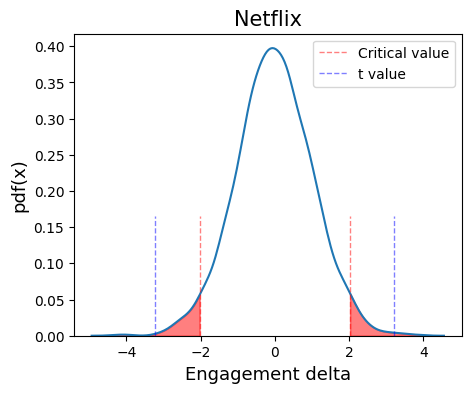

In [18]:
plotKDE(dfN, t1, "Netflix", "Engagement delta", type='two-tailed')

## **Part E**

As a coffee lover, John Doe wants to know whether the price of coffee is significantly different between a sample of coffee shops in York and Leeds. To validate this, he collects the following data from various neighbourhoods in York and Leeds

**York**: [1.5 , 1.5 , 1.79, 1.79, 1.79, 1.79, 1.85, 1.85, 1.85, 1.85, 1.85,
        1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 2.  , 2.  , 2.  , 2.19,
        2.19, 2.29, 2.29, 2.29, 2.29, 2.29, 2.5 , 2.5 ]
        
**Leeds**: [1.99, 1.99, 2.29, 2.29, 2.29, 2.29, 2.49, 2.49, 2.49, 2.49, 2.49,
        2.49, 2.49, 2.49, 2.49, 2.79, 2.79, 2.79, 2.79, 2.79, 2.79, 2.79,
        2.95, 2.95, 2.95, 2.95, 2.95, 2.95, 2.99, 2.99, 2.99, 2.99, 3.49,
        3.49, 3.49]
        

**Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results. State explicitly the hypothesis and the degrees of freedom**

In [19]:
#H0: μY = μL
#H1: μY != μL

In [20]:
coffeePriceY = [1.5]*2 + [1.79]*4 + [1.85]*5 + [1.99]*7 + [2]*3 + [2.19]*2 + [2.29]*5 + [2.5]*2
coffeePriceL = [1.99]*2 + [2.29]*4 + [2.49]*9 + [2.79]*7 + [2.95]*6 + [2.99]*4 + [3.49]*3

dfC = len(coffeePriceY) + len(coffeePriceL) - 2
print("There are %d degrees of freedom" % (dfC))

There are 63 degrees of freedom


In [21]:
mYork    = np.mean(coffeePriceY)
mLeeds   = np.mean(coffeePriceL)
stdYork  = np.std(coffeePriceY, ddof=1)
stdLeeds = np.std(coffeePriceL, ddof=1)

alpha = 0.05

#Calculate pool variance
sp  =( (len(coffeePriceY)-1) * np.power(stdYork,2) + (len(coffeePriceL)-1) * np.power(stdLeeds,2) ) / (len(coffeePriceY) + len(coffeePriceL) - 2)
print("Pooled variance SP = %.3f" % (sp))

#Analytically
t1 = (mYork - mLeeds) / np.sqrt( (sp/len(coffeePriceY)) + (sp/len(coffeePriceL)) )

#Using Scipy
t2 = stats.ttest_ind(coffeePriceY, coffeePriceL)

print("T value analytically: %.3f" % (t1))
print("T value using scipy: %.3f"  % (t2.statistic))

#Because it is a two-tailed probability, we need to assing half of alpha on each tail of the t distribution
t_crit = stats.t.ppf(alpha/2, df=dfC)
print("T critical:%.3f" % (t_crit))

#Using the t value
print("t(%d)=%.3f > %.3f=t_crit -> REJECT H0 (t statistic exceeds the critical value) " %
      (dfC, np.abs(t1), np.abs(t_crit)))

#Using the p value and alpha significance level
print("p=%.6f < %.3f=α -> H0 is REJECTED (lower than α) " %(t2.pvalue, alpha))

Pooled variance SP = 0.103
T value analytically: -8.952
T value using scipy: -8.952
T critical:-1.998
t(63)=8.952 > 1.998=t_crit -> REJECT H0 (t statistic exceeds the critical value) 
p=0.000000 < 0.050=α -> H0 is REJECTED (lower than α) 


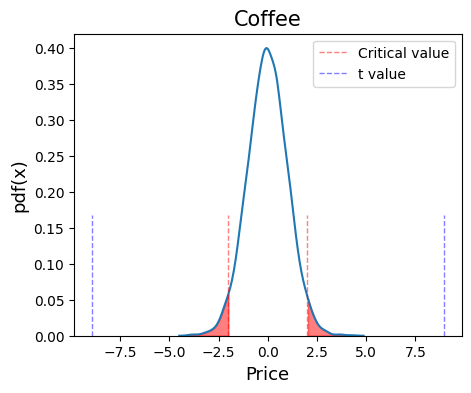

In [22]:
plotKDE(dfC, t1, "Coffee", "Price", type='two-tailed')

## **Part F**

DataVision has been commissioned by the York City Council to analyse a set of data regarding citizens of Yorkshire and extract actionable knowledge.

The dataset for Yorkhire citizens is available on VLE (look for yorkshire.csv in the Practicals section)

Before doing the tasks below, you may want to explore the dataset using a spreadsheet editor (e.g., Excel) to get a high-level view of the dataset.

**TF1) Load the Yorkshire dataset using Pandas**

In [23]:
df = pd.read_csv("yorkshire.csv")
df.head()

,id,age,gender,region,income,married,children,car,mortgage
0,ID12101,48,FEMALE,INNER_CITY,17546.000000,NO,1,NO,NO
1,ID12102,40,MALE,TOWN,30085.100000,YES,3,YES,YES
2,ID12103,51,FEMALE,INNER_CITY,16575.400000,YES,0,YES,NO
3,ID12104,23,FEMALE,TOWN,20375.400000,YES,3,NO,NO
4,ID12105,57,FEMALE,RURAL,15944.690366,YES,0,NO,NO


**TF2) Explore the dataset and try to understand the meaning of each variable (column). Identify which variables are categorical and which are numerical.**

In [24]:
#id:        citizen ID (text)
#age:       citizen age (numerical - discrete)
#gender:    citizen gender (categorical - nominal; male/female)
#region:    inner city/suburban/town/rural (categorical - nomina.)
#income:    amount of income per year (numerical - continuous)
#married:   yes/no (categorical - nominal)
#children:  number of children (numerical - discrete)
#car:       yes/no (does the citizen have a car); (categorical - nominal)
#mortgage:  yes/no (does the citizen have a mortgage); (categorical - nominal)

**TF3) Get the shape of the dataframe**

In [25]:
df.shape

(330, 9)

**TF4) Get the columns name of the dataframe. If you think any column renaming is needed, please do it.**

In [26]:
df.columns

Index(['id', 'age', 'gender', 'region', 'income', 'married', 'children', 'car',
       'mortgage'],
      dtype='object')

**The Council is interested in assessing whether there is any discrimination in annual income between genders.**

**TF5) State the Null and Alternative hypotheses**

In [27]:
# x_m: annual income of male citizens
# x_f: annual income of female citizens
#H0: x_m = x_f
#H1: x_m != x_f

**TF6) Calculate the degrees of freedom**

In [28]:
dfM = df[df['gender']=="MALE"]
dfF = df[df['gender']=="FEMALE"]
dof = len(dfM) + len(dfF) - 2

print("There are %d degrees of freedom" % (dof))

There are 328 degrees of freedom


**TF7) Find the critical value for a two-tailed test with significance level α=0.05**

**Hint**:

* t table http://www.ttable.org
* Confirm that the value is correct using the appropriate statistical test method from scipy.stats.t

In [29]:
alpha = 0.05
t_crit_neg = stats.t.ppf(alpha/2, dof)
t_crit_pos = stats.t.ppf(1-alpha/2, dof)
print("Negative side critical value:", t_crit_neg)
print("Positive side critical value:", t_crit_pos)

Negative side critical value: -1.9672228266462515
Positive side critical value: 1.967222826646251


**TF8) Perform the appropriate t test to evaluate the hypotheses for significance level $\alpha=0.05$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [30]:
incomeM = np.mean(dfM["income"])
incomeF = np.mean(dfF["income"])
stdIncM = np.std(dfM["income"],ddof=1)
stdIncF = np.std(dfF["income"], ddof=1)

#Calculate pool variance
sp  =( ((len(dfM["income"])-1) * np.power(stdIncM,2)) + ((len(dfF["income"])-1) * np.power(stdIncF,2)) ) / (len(dfM["income"]) + len(dfF["income"]) - 2)
print("Pooled variance SP = %.3f" % (sp))

#Analytically
t1 = (incomeM - incomeF) / np.sqrt( (sp/len(dfM["income"])) + (sp/len(dfF["income"])) )

#Using Scipy
t2, pValue = stats.ttest_ind(dfM["income"], dfF["income"])

print("T value analytically: %.3f" % (t1))
print("T value using scipy: %.3f"  % (t2))

#Because it is a two-tailed probability, we need to assing half of alpha on each tail of the t distribution
t_crit = stats.t.ppf(alpha/2, df=dof)
print("T critical:%.3f" % (t_crit))

#Using the t value
print("t(%d)=%.3f < %.3f=t_crit -> H0 is not rejected (not exceeding the critical value)" %
      (dof, np.abs(t1), np.abs(t_crit_pos)))

#Using the p value and alpha significance level
print("p=%.4f > %.3f=α -> H0 is not rejected (not lower than α) " %(pValue, alpha))

Pooled variance SP = 158533309.152
T value analytically: 0.353
T value using scipy: 0.353
T critical:-1.967
t(328)=0.353 < 1.967=t_crit -> H0 is not rejected (not exceeding the critical value)
p=0.7245 > 0.050=α -> H0 is not rejected (not lower than α) 


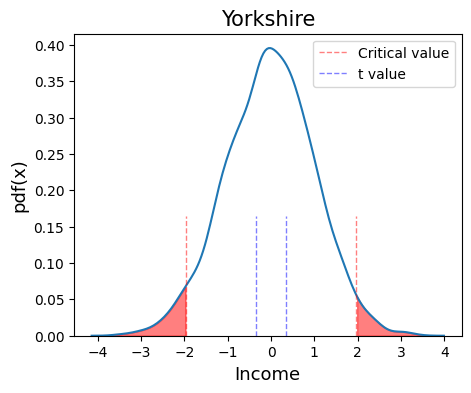

In [31]:
plotKDE(dof, t1, "Yorkshire", "Income", type='two-tailed')

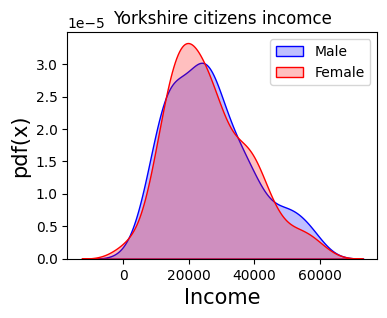

In [32]:
fig, ax = plt.subplots(figsize=(4,3), dpi=100)

sns.kdeplot(dfM["income"], ax=ax, shade=True, color="blue", label="Male")
sns.kdeplot(dfF["income"], ax=ax, shade=True, color="red", label="Female")

plt.title('Yorkshire citizens incomce')
ax.set_xlabel('Income',fontsize=15) # set x label
ax.set_ylabel('pdf(x)',fontsize=15,rotation=90) # set y label
plt.legend();

**The Council is interested in assessing whether there is any discrimination in annual income between married and single citizens, and specifically whether married citizens are being paid more**

**TF9) State the Null and Alternative hypotheses**

In [33]:
# x_m: annual income of married citizens
# x_s: annual income of single citizens
#H0: x_m <= x_s
#H1: x_m > x_s

**TF10) Calculate the degrees of freedom**

In [34]:
dfMar = df[df['married']=="YES"]
dfSin = df[df['married']=="NO"]
dof = len(dfMar) + len(dfSin) - 2

print("Married:", len(dfMar))
print("Single:", len(dfSin))
print("There are %d degrees of freedom" % (dof))

Married: 214
Single: 116
There are 328 degrees of freedom


**TF11) Find the critical value for the test with significance level $\alpha =0.05$**

In [35]:
#Because we want > => the rejection region lies on upper tail of the t-Distribution (upper-tailed)
#The ppf gives the lower tail probability, so we subtract from 1 to get the upper tail
t_crit = stats.t.ppf(1-alpha, dof)#0.95
t_crit

1.6495124933663257

**TF12) Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [36]:
incomeMar = np.mean(dfMar["income"])
incomeSin = np.mean(dfSin["income"])
stdIncMar = np.std(dfMar["income"],ddof=1)
stdIncSin = np.std(dfSin["income"], ddof=1)

#Calculate pool variance
sp  =( ((len(dfMar["income"])-1) * np.power(stdIncMar,2)) + ((len(dfSin["income"])-1) * np.power(stdIncSin,2)) ) / (len(dfMar["income"]) + len(dfSin["income"]) - 2)
print("Pooled variance SP = %.3f" % (sp))

#Analytically
t1 = (incomeMar - incomeSin) / np.sqrt( (sp/len(dfMar["income"])) + (sp/len(dfSin["income"])) )

#Using Scipy
t2, pValue = stats.ttest_ind(dfMar["income"], dfSin["income"])

print("T value analytically: %.3f" % (t1))
print("T value using scipy: %.3f"  % (t2))

print("T critical:%.3f" % (t_crit))

#Using the t value
print("t(%d)=%.3f < %.3f=t_crit -> H0 is not rejected (not exceeding the critical value)" %
      (dof, np.abs(t1), np.abs(t_crit)))

#Using the p value and alpha significance level
print("p=%.4f > %.3f=α -> H0 is not rejected (not lower than α) " %(pValue/2, alpha))

Pooled variance SP = 158561804.212
T value analytically: 0.256
T value using scipy: 0.256
T critical:1.650
t(328)=0.256 < 1.650=t_crit -> H0 is not rejected (not exceeding the critical value)
p=0.3991 > 0.050=α -> H0 is not rejected (not lower than α) 


**TF13) Plot the two distributions of income for married and single citizens**

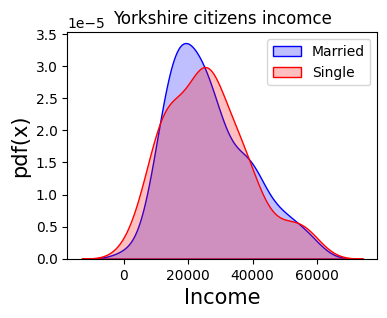

In [37]:
fig, ax = plt.subplots(figsize=(4,3), dpi=100)

sns.kdeplot(dfMar["income"], ax=ax, shade=True, color="blue", label="Married")
sns.kdeplot(dfSin["income"], ax=ax, shade=True, color="red", label="Single")

plt.title('Yorkshire citizens incomce')
ax.set_xlabel('Income',fontsize=15) # set x label
ax.set_ylabel('pdf(x)',fontsize=15,rotation=90) # set y label
plt.legend();

**The Council is also interested in assessing whether there is any statistically significant difference in income depending on the region citizens live. They want to give equal opportunities to all Yorkies irrespective of where they live.**

**TF14) State the Null and Alternative hypotheses that will enable the Council to check whether there is any discrimination in income depending on location**

$H_0: \overline{X}_{inner} = \overline{X}_{town} = \overline{X}_{sub} = \overline{X}_{rural}$

$H_1: \exists i,j \in \{inner, town, sub, rural\} \bullet (i \neq j) \land (\overline{X}_{i} \neq \overline{X}_{j})$


**TF15) Calculate the degrees of freedom**

In [38]:
groups = 4
total_size = df.shape[0]

dof_M = groups-1     #4-1 
dof_R = total_size-groups   #330-4 

print("dof_M:", dof_M)
print("dof_R:", dof_R)

dof_M: 3
dof_R: 326


**TF16) Find the critical value for a test with significance level α=0.05**

In [39]:
#We want the critical region for alpha = 0.05
#However, the percent point function f.ppf gives the lower tail probability
#So to find the critical value of F we need to do 
#https://www.yumpu.com/en/document/read/32835010/f-table
f_crit = stats.f.ppf(1-alpha, dof_M, dof_R)
f_crit

2.6323096448361603

**TF17) Perform the appropriate test to evaluate the hypotheses for significance level $\alpha = 0.05$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [40]:
#Analytically
dfInner  = df[df["region"]=="INNER_CITY"]["income"]
dfTown   = df[df["region"]=="TOWN"]["income"]
dfRURAL  = df[df["region"]=="RURAL"]["income"]
dfSub    = df[df["region"]=="SUBURBAN"]["income"]

X_N = np.mean(np.mean(df["income"]))
X_G = [np.mean(dfInner), np.mean(dfTown), np.mean(dfRURAL), np.mean(dfSub)]

SS_M = 0; SS_R = 0; SS_T=0

SS_M += len(dfInner) * np.power(np.mean(dfInner) - X_N,2)
SS_M += len(dfTown) * np.power(np.mean(dfTown) - X_N,2)
SS_M += len(dfRURAL) * np.power(np.mean(dfRURAL) - X_N,2)
SS_M += len(dfSub) * np.power(np.mean(dfSub) - X_N,2)

SS_R += (len(dfInner)-1) * np.var(dfInner, ddof=1)
SS_R += (len(dfTown)-1) * np.var(dfTown, ddof=1)
SS_R += (len(dfRURAL)-1) * np.var(dfRURAL, ddof=1)
SS_R += (len(dfSub)-1) * np.var(dfSub, ddof=1)
    
SS_T = (len(df["income"]) -1) * np.var(df["income"], ddof=1)

# print(SS_T, SS_R, SS_M)                                          
                                          
F1 = (SS_M/(groups-1))/\
    (SS_R/(np.count_nonzero(df['income'])-groups))

# #Using Scipy library
F2, pValue = stats.f_oneway(dfInner, dfTown, dfRURAL, dfSub)

print("F value analytically: %.3f" % (F1))
print("F value using scipy: %.3f"  % (F2))

print("F critical:%.3f" % (f_crit))

#Using the f value
print("f(%d,%d)=%.3f < %.3f=f_crit -> H0 is not rejected (not exceeding the critical value)" %
      (dof_M, dof_R, np.abs(F1), np.abs(f_crit)))

#Using the p value and alpha significance level
print("p=%.4f > %.3f=α -> H0 is not rejected (not lower than α) " %(pValue, alpha))

F value analytically: 0.284
F value using scipy: 0.284
F critical:2.632
f(3,326)=0.284 < 2.632=f_crit -> H0 is not rejected (not exceeding the critical value)
p=0.8372 > 0.050=α -> H0 is not rejected (not lower than α) 


**TF18) Plot a boxplot showing the income per region. Dooes the boxplot confirm your findings in task TF17?**

<AxesSubplot:>

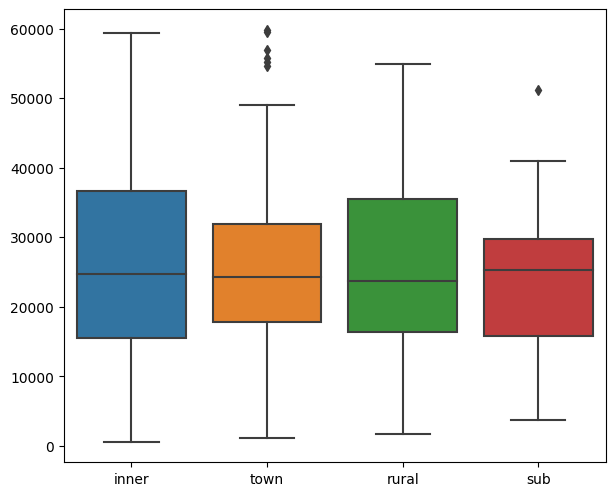

In [41]:
regions = pd.DataFrame(data={"inner":dfInner, "town":dfTown, "rural":dfRURAL, "sub":dfSub})
plt.subplots(figsize=(7,6), dpi=100)
sns.boxplot(data=regions)

**The Council is also interested in assessing whether there is any statistically significant difference in income depending on the age of citizens. The Council considers the following age groups [17-29], [30,41], [42,53], [54,67]**

**TF19) State the Null and Alternative hypotheses that will enable the Council to check whether there is any discrimination in income depending on these age groups**

$H_0: \overline{X}_{G1} = \overline{X}_{G2} = \overline{X}_{G3} = \overline{X}_{G4}$

$H_1: \exists i,j \in \{G1, G2, G3, G4\} \bullet (i \neq j) \land (\overline{X}_{i} \neq \overline{X}_{j})$


**TF20) Calculate the degrees of freedom**

In [42]:
groups = 4
total_size = df.shape[0]

dof_M = groups-1     #4-1 
dof_R = total_size-groups   #330-4 

print("dof_M:", dof_M)
print("dof_R:", dof_R)

dof_M: 3
dof_R: 326


**TF21)  Perform the appropriate test to evaluate the hypotheses for significance level $\alpha =0.05$. You may use the appropriate scipy.stats method.**

In [43]:
dfG1  = df[df["age"]<30]["income"]
dfG2   = df[(df["age"]>=30) & (df["age"]<42)]["income"]
dfG3  = df[(df["age"]>=42) & (df["age"]<54)]["income"]
dfG4    = df[(df["age"]>=54)]["income"]

alpha = 0.05

f1, pValue = stats.f_oneway(dfG1, dfG2, dfG3, dfG4)
f_crit = stats.f.ppf(0.95, dof_M, dof_R)

#Using the f value
print("f(%d,%d)=%.3f > %.3f=f_crit -> H0 is REJECTED (exceeding the critical value)" %
      (dof_M, dof_R, np.abs(f1), np.abs(f_crit)))

#Using the p value and alpha significance level
print("p=%.6f < %.3f=α -> H0 is REJECTED (lower than α) " %(pValue, alpha))


f(3,326)=60.504 > 2.632=f_crit -> H0 is REJECTED (exceeding the critical value)
p=0.000000 < 0.050=α -> H0 is REJECTED (lower than α) 


**TF22) Plot the distributions for the four age groups**

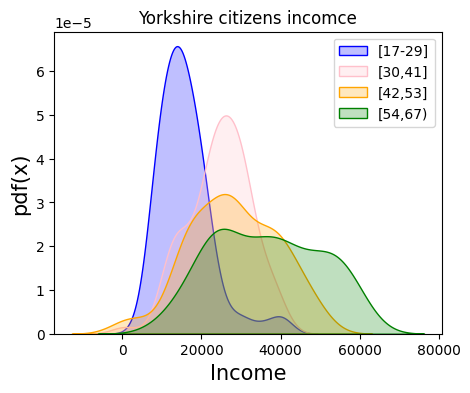

In [44]:
fig, ax = plt.subplots(figsize=(5,4), dpi=100)

sns.kdeplot(dfG1, ax=ax, shade=True, color="blue", label="[17-29]")
sns.kdeplot(dfG2, ax=ax, shade=True, color="pink", label="[30,41]")
sns.kdeplot(dfG3, ax=ax, shade=True, color="orange", label="[42,53]")
sns.kdeplot(dfG4, ax=ax, shade=True, color="green", label="[54,67)")

plt.title('Yorkshire citizens incomce')
ax.set_xlabel('Income',fontsize=15) # set x label
ax.set_ylabel('pdf(x)',fontsize=15,rotation=90) # set y label
plt.legend();

**TF23) Perform a post hoc analysis using the Bonferroni correction to identify the pairs which exhibit statistically significant difference**

In [45]:
bonf = 0.05/6
tG12 = stats.ttest_ind(dfG1, dfG2)
tG13 = stats.ttest_ind(dfG1, dfG3)
tG14 = stats.ttest_ind(dfG1, dfG4)
tG23 = stats.ttest_ind(dfG2, dfG3)
tG24 = stats.ttest_ind(dfG2, dfG4)
tG34 = stats.ttest_ind(dfG3, dfG4)

print("Adjusted p crit : {:.4f}".format(bonf/2))
print("ComptG12: {:.4f}".format(tG12[1]))
print("ComptG13: {:.4f}".format(tG13[1]))
print("ComptG14: {:.4f}".format(tG14[1]))
print("ComptG23: {:.4f}".format(tG23[1]))
print("ComptG24: {:.4f}".format(tG24[1]))
print("ComptG34: {:.4f}".format(tG34[1]))

#All have differences except groups 2 and 3 (30-41, 42-53)

Adjusted p crit : 0.0042
ComptG12: 0.0000
ComptG13: 0.0000
ComptG14: 0.0000
ComptG23: 0.0187
ComptG24: 0.0000
ComptG34: 0.0000


**TF24) Plot a boxplot showing the income per age group**

<AxesSubplot:>

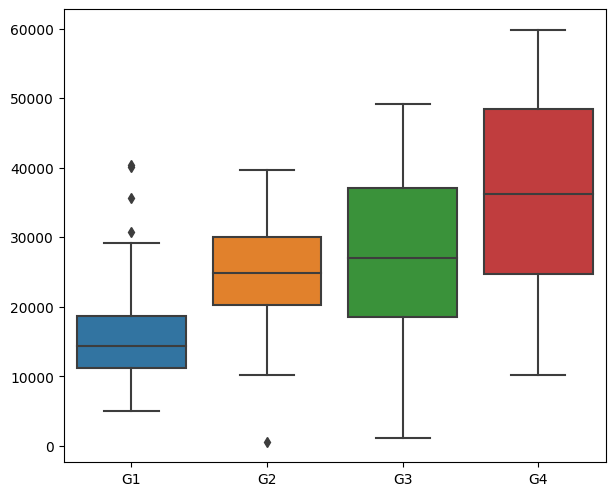

In [46]:
ages = pd.DataFrame(data={"G1":dfG1, "G2":dfG2, "G3":dfG3, "G4":dfG4})
plt.subplots(figsize=(7,6), dpi=100)
sns.boxplot(data=ages)

***

## Should you want to practice at home, you could

* Go back to the previous practicals and run some statistical tests

* The formula for sample standard deviation is $s = \sqrt{\frac{\sum_{i=1}^{n}(x_i-\overline{x})^2}{n-1}}$
  Think about how you can demonstrate through simulation why $n-1$ (in the denominator) is appropriate; i.e., why not $n-2$, $n-3$ etc? For your information, this is called the Bessel's Correction.
